## Packages 


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import glob
import nibabel as nib
from skimage.io import imsave
from skimage.transform import resize
from sklearn.preprocessing import normalize
import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from skimage.io import imread, imshow
from sklearn.model_selection import train_test_split
from keras.callbacks import  ModelCheckpoint
import matplotlib.pyplot as plt

%matplotlib inline

!pip install segmentation_models

import segmentation_models as sm


!python -m pip install -U efficientnet

## Download The Data 

In [0]:

#Download the dataset
!wget https://zenodo.org/record/3757476/files/COVID-19-CT-Seg_20cases.zip?download=1
!wget https://zenodo.org/record/3757476/files/Lung_and_Infection_Mask.zip?download=1

# Rename the zip files to images and masks, it will be save in the content colab directory 
!mv COVID-19-CT-Seg_20cases.zip?download=1 images.zip
!mv Lung_and_Infection_Mask.zip?download=1 masks.zip

# Extract the two zip files to its nifti files
!unzip -uq "images.zip" -d "images"
!unzip -uq "masks.zip" -d "masks"


# Create temporal Directory 'DataSet' to save the images(png) and masks(png) in google server   
!mkdir DataSet
!mkdir DataSet/images 
!mkdir DataSet/masks


## Load & Preprocess Data

In [0]:

#=================================================================
# Copy DataLoader.py file to temporary colab server to be able to import it 
! cp "drive/My Drive/Project/DataLoader.py" '.'

#Import the file 
from importlib import reload
import DataLoader as ld
ld = reload(ld)

# call nifToPng function which extract all the nifti files for images and masks and
# apply preprocessing then save them in DataSet in the temporal google servers 
ld.nifToPng('images','masks');

## Copy Data To Drive.
Data originaly is saved to temporal colab server not drive. 
then by running this code we copy it to drive to store it permenantly

In [0]:
# Do this if there is no data in drive 
#!mkdir 'drive/My Drive/Project/DataSet'
!cp -r 'DataSet/' 'drive/My Drive/Project'

# check number of images and masks  in colab and drive 
print(len(os.listdir('drive/My Drive/Project/DataSet/images')))
print(len(os.listdir('drive/My Drive/Project/DataSet/masks')))
print(len(os.listdir('DataSet/masks')))
print(len(os.listdir('DataSet/images')))


## Copy Data From Drive to Temporal colab google server. 
do this step if the temporal session of colab ends and the data is deleted

In [0]:
# when the session ends, all the data on colab server will be deleted. So we get the data from
# the saved dataset in colab.  
# To Copy data from drive to colab it takes som much time so  zip the folder in drive then copy it
# to colab then unzip it 

!cp -r 'drive/My Drive/Project/Dataset.zip' '.'
# unzip the file, change the file name to whatever the zip file name
!unzip -uq "Dataset.zip" -d '.'




## **Train, Test, Validation** 

In [0]:
# Call the splitData function which works on the 
# temporal google server where it is faster 
#! cp "drive/My Drive/Project/DataLoader.py" '.'
X_train, X_tset, Y_train, Y_test, X_, X_val, Y_, Y_val,X = ld.splitData()


## **Build The Network**

In [0]:
# Copy Model.py file from drive to colab server 
! cp "drive/My Drive/Project/Model.py" '.'

# Import the Model file , we added the reload package to update the changes auto from drive to colab 
from importlib import reload
import Model as mdl
mdl = reload(mdl)

# Buid network, X is the input tensor
mdl.Network(X)




## **Fit The Model**


In [85]:
# Training
history, model = mdl.Fit(X_train, Y_train, X_val, Y_val)


Train on 2816 samples, validate on 352 samples
Epoch 1/20
2816/2816 [==============================] - 155s 55ms/step - loss: 0.8504 - iou_score: 0.2807 - val_loss: 0.7313 - val_iou_score: 0.3148
Epoch 2/20
2816/2816 [==============================] - 59s 21ms/step - loss: 0.4752 - iou_score: 0.4896 - val_loss: 0.4461 - val_iou_score: 0.5063
Epoch 3/20
2816/2816 [==============================] - 59s 21ms/step - loss: 0.3400 - iou_score: 0.6005 - val_loss: 0.3160 - val_iou_score: 0.6188
Epoch 4/20
2816/2816 [==============================] - 59s 21ms/step - loss: 0.2437 - iou_score: 0.6848 - val_loss: 0.2283 - val_iou_score: 0.6977
Epoch 5/20
2816/2816 [==============================] - 59s 21ms/step - loss: 0.1887 - iou_score: 0.7402 - val_loss: 0.1869 - val_iou_score: 0.7407
Epoch 6/20
2816/2816 [==============================] - 58s 21ms/step - loss: 0.1658 - iou_score: 0.7661 - val_loss: 0.1592 - val_iou_score: 0.7717
Epoch 7/20
2816/2816 [==============================] - 58s 21ms

## **Metrices**


[0.28071252, 0.48957768, 0.6005277, 0.68475336, 0.74016243, 0.7661274, 0.78857267, 0.79769367, 0.81593823, 0.8208334, 0.8297775, 0.8392576, 0.8422287, 0.84839684, 0.8504116, 0.85170686, 0.85590804, 0.8607975, 0.8652891, 0.86626434]


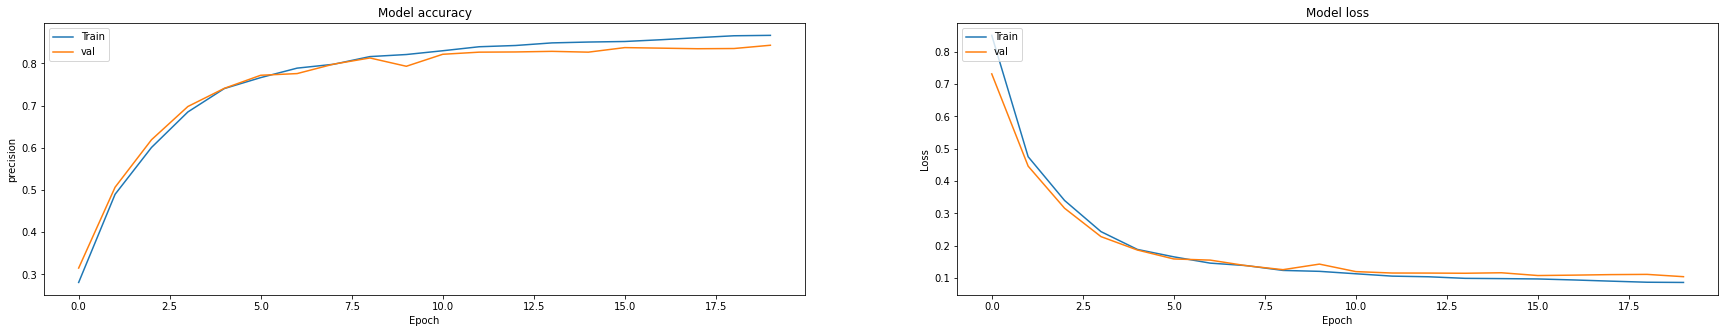

In [88]:
# for item in historyresnet.history:
#   print(item,'-->',historyresnet.history[item])
plt.figure(figsize=(30, 5), num = 'Metrics')
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model accuracy')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')

print(history.history['iou_score'])

## **Prediction**

[3.5936269e-17 4.3107267e-17 4.8074394e-17 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
(352, 128, 128, 4)
[False  True]
(352, 128, 128, 4)
(352, 128, 128, 1)
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, None, None, 1)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, None, None, 3)     6         
_________________________________________________________________
model_15 (Model)             (None, None, None, 4)     26379012  
Total params: 26,379,018
Trainable params: 26,147,978
Non-trainable params: 231,040
_________________________________________________________________
None


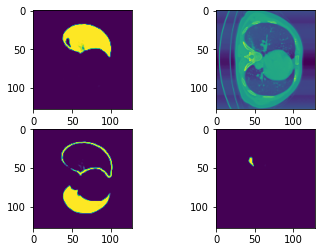

In [87]:
pred= model.predict(X_tset)
print(np.unique(pred))

print(pred.shape)

# pred= np.sum(pred,axis=3
print(np.unique(Y_test))
plt.subplot('221')
plt.imshow(pred[50,:,:,2])
plt.subplot('222')
plt.imshow(X_tset[50,:,:,0])
plt.subplot('223')
plt.imshow(pred[50,:,:,1])
plt.subplot('224')
plt.imshow(pred[50,:,:,3])

print(Y_test.shape)
print(X_tset.shape)

print(model.summary())